In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.corpus import stopwords
import nltk
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import TruncatedSVD

In [3]:
with open('norm_corpus.pickle', 'rb') as f: 
    norm_corpus = pickle.load(f)

In [4]:
type(norm_corpus)

list

In [5]:
#norm_corpus = [line.lower() for line in norm_corpus]

In [6]:
norm_corpus

['river   see   havent   yelp   one   place   want   everyon   know   everyon   one   vegetarian   friend   right   theyr   alway   tail   make   friend   cant   get   mcrib   local   mcd   make   sure   reiter   order   beeeeef   sub   beannnnn   tb   geez   there   need   fear   veggi   hous   ive   tri   varieti   dish   ive   yet   disappoint   panfri   noodl   mongolian   beef   wonton   soup   beef   ramen   sweet   soup   chicken   jasmin   tea   bun   roll   need   order   fri   bun   roll   thank   later   place   veganvegetarian   serv   meat   ye   tell   besti   everi   singl   time   put   quot   around   meat   product   peopl   dont   get   darn   confus   meat   real   trust   good   thing   especi   hit   tabl   itll   scratch   head   cool   meat   start   get   bit   textur   still   pretti   great   thing   cant   textur   your   probabl   safer   stick   someth   veggi   instead   food   ive   realli   great   even   servic   littl   shoddi   dont   let   deter   g

In [7]:
vectorizer = TfidfVectorizer (ngram_range=(2,2),max_features=12500)
X = vectorizer.fit_transform (norm_corpus)

In [8]:
print (X[0])

  (0, 8843)	0.18812766654629726
  (0, 2393)	0.16630467617742986
  (0, 9493)	0.16726543800662116
  (0, 4563)	0.18564291909443825
  (0, 8339)	0.14594701885535208
  (0, 3492)	0.16944363250039138
  (0, 4649)	0.16776055186072664
  (0, 7943)	0.18978249203128297
  (0, 10113)	0.1815504435017228
  (0, 3933)	0.1938428303245804
  (0, 10060)	0.17729801259287284
  (0, 4417)	0.1371868474298085
  (0, 2387)	0.1398278978925348
  (0, 7368)	0.17612041543407408
  (0, 9690)	0.18399520648254186
  (0, 2823)	0.14798044432496385
  (0, 10767)	0.20159820548591126
  (0, 7074)	0.1683299716810083
  (0, 6488)	0.18351004534279217
  (0, 12249)	0.1857744505045105
  (0, 6376)	0.18993871234375476
  (0, 5184)	0.2063570448339135
  (0, 2324)	0.18886582664644025
  (0, 11648)	0.18812766654629726
  (0, 11347)	0.1829169945236995
  (0, 5178)	0.13763135270063573
  (0, 11763)	0.17576934082219892
  (0, 6044)	0.11412466713140795
  (0, 1311)	0.15992702356566776
  (0, 10802)	0.19206732758593884
  (0, 2837)	0.18538198732048225
  (0, 77

In [9]:
lsa = TruncatedSVD (n_components=10, n_iter=100)#n_com nmber of concepts we want to find
lsa.fit(X)

TruncatedSVD(n_components=10, n_iter=100)

In [10]:
Sigma = lsa.singular_values_
Sigma

array([25.40447251, 17.73228187, 17.35564355, 16.83238397, 15.75597973,
       15.02633754, 14.79005293, 14.64730396, 14.50552351, 14.35878509])

[Text(0, 0.5, 'Relative of Importance'), Text(0.5, 0, 'Components')]

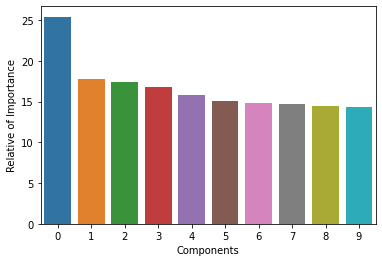

In [11]:
ax = sns.barplot(x=list(range(len(Sigma))), y = Sigma)
ax.set(xlabel='Components', ylabel='Relative of Importance')

In [12]:
row1 = lsa.components_[0] #the row 1 
row1

array([0.00245209, 0.00384008, 0.00201168, ..., 0.0036876 , 0.00173308,
       0.00252203])

In [13]:
print(len(row1))

12500


In [14]:
terms = vectorizer.get_feature_names()
terms[:20]

['abl accommod',
 'abl eat',
 'abl enjoy',
 'abl find',
 'abl finish',
 'abl get',
 'abl make',
 'abl order',
 'abl seat',
 'abl see',
 'abl sit',
 'abl tri',
 'absolut amaz',
 'absolut best',
 'absolut delici',
 'absolut fantast',
 'absolut favorit',
 'absolut great',
 'absolut horribl',
 'absolut incred']

In [15]:
for i,comp in enumerate(lsa.components_):#enumerate return index and row, a list of tuples
    componentTerms = zip(terms,comp) #we use zip to combine values and terms
    #sort component terms, by concept value,lambda x (x correpsnding tuples) and X[1] the value
    sortedTerms = sorted(componentTerms, key=lambda x:x[1], reverse=True) #decending order
    sortedTerms = sortedTerms[:10] #select 10 most imp. terms in a specific concept
    print ("\nConcept",i,":")
    for term in sortedTerms:
        print (term)


Concept 0 :
('come back', 0.26108814209897113)
('sushi place', 0.17762168268430292)
('great servic', 0.17005236805145232)
('happi hour', 0.1683718919565084)
('la vega', 0.16574442435784506)
('great food', 0.16431657482206977)
('servic great', 0.14462634669719374)
('food great', 0.13852485499128933)
('first time', 0.1377422065369423)
('definit come', 0.13742441661216825)

Concept 1 :
('great food', 0.5197522773292617)
('great servic', 0.4942208931457993)
('food great', 0.42189735672269585)
('servic great', 0.24267815851865734)
('great price', 0.07562810087200358)
('place great', 0.05546828382136599)
('food servic', 0.052253581112073275)
('great atmospher', 0.044495860067142776)
('love place', 0.04027112138035996)
('good food', 0.04026695947581159)

Concept 2 :
('come back', 0.6812702456573716)
('definit come', 0.4353660548966224)
('first time', 0.1029585684484167)
('would definit', 0.10270551195062383)
('would come', 0.06624988453422076)
('next time', 0.06390540529712135)
('back tri', 

In [16]:
concept_words = {}

In [17]:
for i,comp in enumerate(lsa.components_):#enumerate return index and row, a list of tuples
    componentTerms = zip(terms,comp) #we use zip to combine values and terms
    #sort component terms, by concept value,lambda x (x correpsnding tuples) and X[1] the value
    sortedTerms = sorted(componentTerms, key=lambda x:x[1], reverse=True) #decending order
    sortedTerms = sortedTerms[:10] #select 10 most imp. terms in a specific concept
    concept_words["Concept " + str(i)] = sortedTerms #all concepts mapped with list of tuples

In [18]:
concept_words

{'Concept 0': [('come back', 0.26108814209897113),
  ('sushi place', 0.17762168268430292),
  ('great servic', 0.17005236805145232),
  ('happi hour', 0.1683718919565084),
  ('la vega', 0.16574442435784506),
  ('great food', 0.16431657482206977),
  ('servic great', 0.14462634669719374),
  ('food great', 0.13852485499128933),
  ('first time', 0.1377422065369423),
  ('definit come', 0.13742441661216825)],
 'Concept 1': [('great food', 0.5197522773292617),
  ('great servic', 0.4942208931457993),
  ('food great', 0.42189735672269585),
  ('servic great', 0.24267815851865734),
  ('great price', 0.07562810087200358),
  ('place great', 0.05546828382136599),
  ('food servic', 0.052253581112073275),
  ('great atmospher', 0.044495860067142776),
  ('love place', 0.04027112138035996),
  ('good food', 0.04026695947581159)],
 'Concept 2': [('come back', 0.6812702456573716),
  ('definit come', 0.4353660548966224),
  ('first time', 0.1029585684484167),
  ('would definit', 0.10270551195062383),
  ('would 